# Exploring the Titanic Disaster 
The Titanic sank on  April 15, 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. At the time of its construction the Titanic was the largest ocean liner in the world. The Titanic struck an iceberg at around midnight that subsequently caused it to sink and kill over 1500 of the more than 2200 passengers onboard.

![](img/TitanicDiagram.jpg)

This notebook explores the Titanic data set. The data includes a variety of features from the passengers onboard the titanic when it sank. The dependent variable we will try to predict will be the passenger survival rate. 

1. A preliminary data analysis will provide insight into the Titanic dataset.
2. The Data Science work flow will be applied to clean the data and engineer relevant features.
3. Statistical Models will be created and optimised to predict the survival rate of passengers on a separate test set. This will be evaluated on the kaggle "Titanic - Machine Learning from Disaster" competition

This notebook was created with the help of the following recourses:
- https://www.kaggle.com/kenjee/titanic-project-example
- https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
- https://github.com/minsuk-heo/kaggle-titanic/tree/master

# 1. Data Analysis

In [1]:
# Before getting started lets import some libraries for our initial investigation
import numpy as np
import pandas as pd

In [2]:
#Lets import the two datasets we will be working with
train = pd.read_csv('Datasets/train.csv')
test = pd.read_csv('Datasets/test.csv')

In [3]:
#Lets have a look at the shapes of our datasets
print("Train set has shape: " + str(train.shape))
print("Test set has shape: " + str(test.shape))

Train set has shape: (891, 12)
Test set has shape: (418, 11)


There are 891 passengers entries in our Train dataset, while our test dataset has 418 entries. Whilst the Train dataset has an extra feature compared to the Test dataset (Passenger Entries, Number of Features).

# 1.1. Data Exploration

In [4]:
#Lets take a peak at our data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The Test set is missing the Survived feature.

*Feature Dictionary:*
- "Survived": 0 = No, 1 = Yes
- "Pclass": Passenger class 1 = 1st, 2 = 2nd, 3 =3rd
- "SibSp": Number of sibling or spouses on board the Titanic
- "Parch: Number of parents or children on board the Titanic
- "Cabin": Cabin Number
- "Embarked": Port passengers embarked on to the Titanic: C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Numeric data: 
Categorical data: 

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We will have to do some feature engineering to account for the missing Age and Cabin values in the train set and the missing fare values in the test set.

# 1.1.1. Splitting Datasets

In [10]:
train_X = train.drop('Survived', axis = 1, inplace = False)
train_Y = train.Survived

test_X = test.copy()

# 1.2. Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [12]:
# Lets split our feautres into numeric and categorical
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# 1.2.1. Numeric Features

In [13]:
from scipy.stats import skew, norm
import scipy.stats as stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

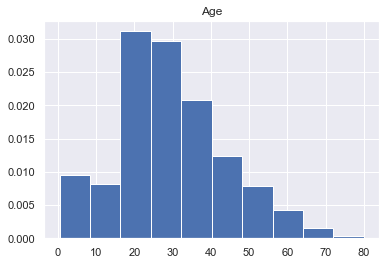

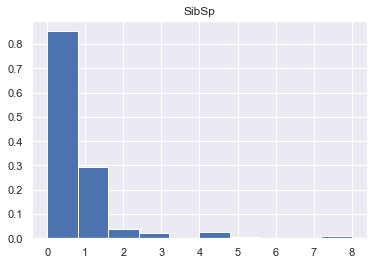

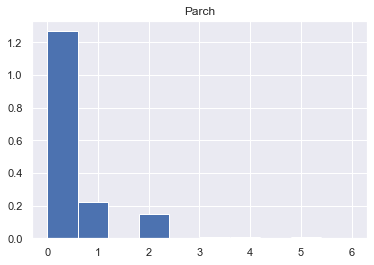

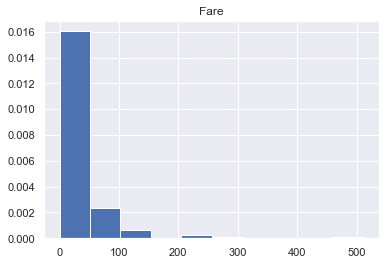

In [14]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i], density = True)
    plt.title(i)
    plt.show()

From the histograms we can see that Age is fairly normally distributed. SibSp and Parch are not normally distributed, however there are few enough categories that normalising would less of an impact effect. Fare should be normalised.

In [15]:
df_num.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

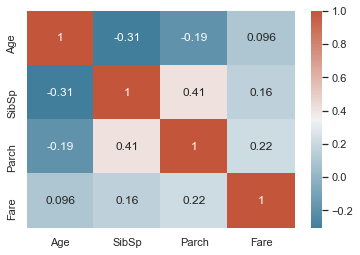

In [16]:
sns.heatmap(df_num.corr(), cmap = sns.diverging_palette(230, 20, as_cmap=True), annot = True)

The number of parents (Parch) and the number of siblings (SibSp) are positively correlated. This suggestes that familys will tend to travel together (as shown by the red colour). It wowuld be logical to group these two together into a single feature.

Note on Multicolinearity: 

*Multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.*

*In other words,multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.*

Note on Pivot Tables:

*A Pivot Table is used to summarise, sort, reorganise, group, count, total or average data stored in a table. It allows us to transform columns into rows and rows into columns. It allows grouping by any field (column), and using advanced calculations on them.*

In [17]:
# Lets compare survival across our numeric features
pd.pivot_table(train, index = "Survived", values = df_num, aggfunc = "mean")

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


On average younger passengers, passengers who piad a higher fare and passengers who had a parent or child onboard were more likely to survive. 

In [18]:
#lets explore how these other categorical features are related
pd.pivot_table(train, index = "Pclass", values = df_num, aggfunc = "mean")

,Age,Fare,Parch,SibSp
Pclass,,,,
1,38.233441,84.154687,0.356481,0.416667
2,29.877630,20.662183,0.380435,0.402174
3,25.140620,13.675550,0.393075,0.615071


Higher class passengers on overage where older and paid a higher Fare. This makes sence as people with higher social status are typically older.

In [19]:
pd.pivot_table(train, index = "Sex", values = df_num, aggfunc = "mean")

,Age,Fare,Parch,SibSp
Sex,,,,
female,27.915709,44.479818,0.649682,0.694268
male,30.726645,25.523893,0.235702,0.429809


Women on average had more famlily members (Parch & SibSp) on board the on board the titanic.

In [20]:
pd.pivot_table(train, index = "Embarked", values = df_num, aggfunc = "mean")

,Age,Fare,Parch,SibSp
Embarked,,,,
C,30.814769,59.954144,0.363095,0.386905
Q,28.089286,13.276030,0.168831,0.428571
S,29.445397,27.079812,0.413043,0.571429


The average Fare varies depeneding on the port passengers embarked on. Could different Passenger Classes have embarked more or less at a certain port?

# 1.2.2. Categorical Features

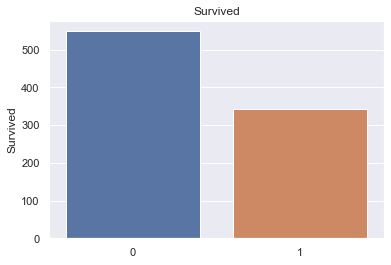

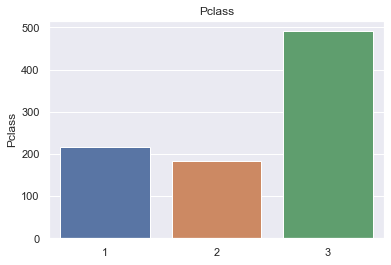

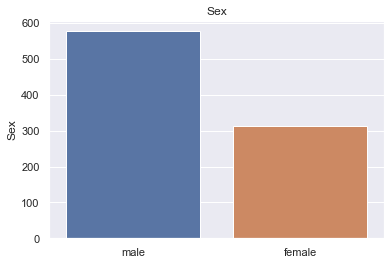

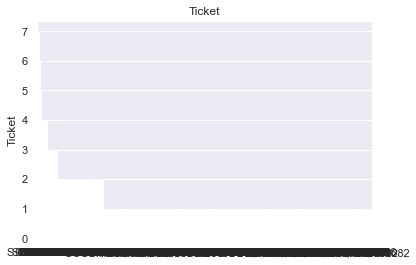

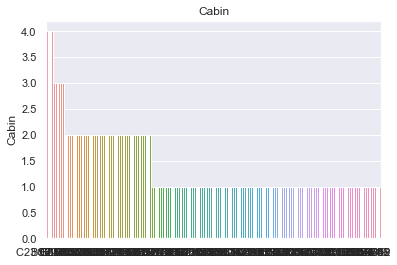

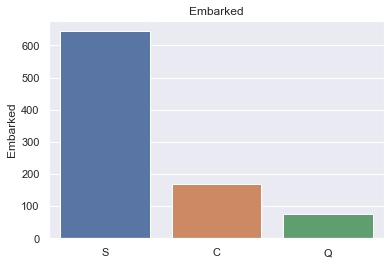

In [21]:
for i in df_cat.columns:
    sns.barplot(x= df_cat[i].value_counts().index,y = df_cat[i].value_counts()).set_title(i)
    plt.show()

What does this tell us?
- More passengers died than survived
- More than half the passengers on the Titanic were in 3rd class.
- There were almost twice as many men on the titanic than women.

Cabin and Tickets graphs contain an excessive amount of categories, we will engineer some features in the following section to clean this data up.

Lets compare survival across these categorical varieables. Because of the discrete nature of the Parch and SibSp features we will also consider them in this analysis.

In [22]:
def bar_chart(feature):
    df = train.groupby(["Survived", feature]).size().unstack()
    df.index = ["Dead", "Survived"]
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))
    print(df)

def bar_chart1(feature):
    df = train.groupby([feature, "Survived"]).size().unstack()
    df.columns = ["Dead", "Survived"]
    df.plot(kind = "bar", stacked = True, figsize = (10,5), rot=0, alpha = 0.9)
    print(df)

        Dead  Survived
Sex                   
female    81       233
male     468       109


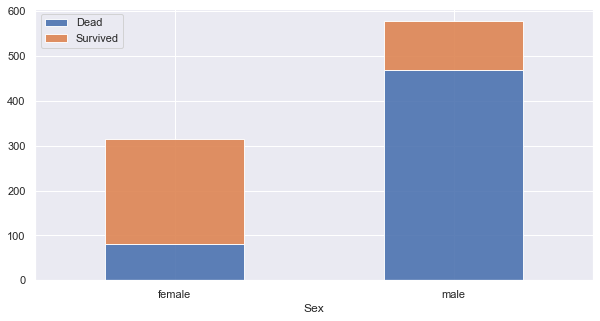

In [23]:
bar_chart1("Sex")

A higher portion of Women compared to Men survived

        Dead  Survived
Pclass                
1         80       136
2         97        87
3        372       119


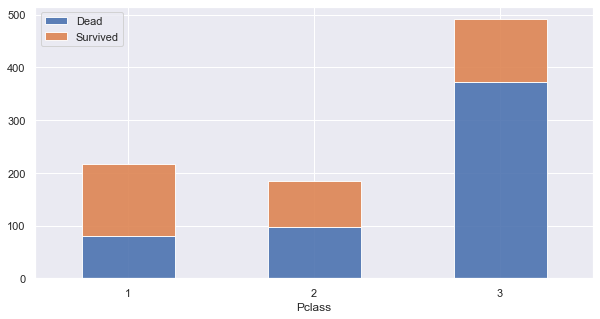

In [24]:
bar_chart1('Pclass')

1st class passengers had a higher survival rate whilst 3rd class passegners had the lowest survival rate

Embarked   C   Q    S
Dead      75  47  427
Survived  93  30  217


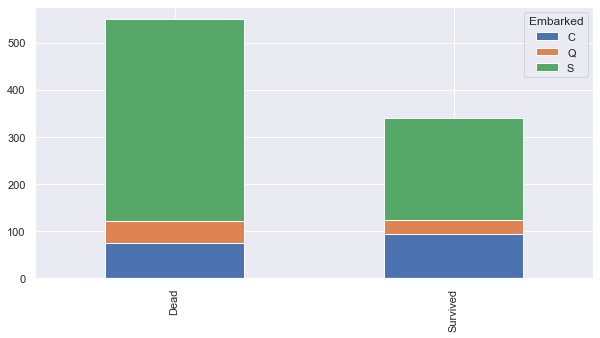

In [25]:
bar_chart("Embarked")

This data looks fairly evenly distributed between the three categories. However it appear that passengers who embarked from Cherbourg where slightly more likely to survive, whilst those that embarked from Southampton were slightly more likely to die.

SibSp         0      1     2     3     4    5    8
Dead      398.0   97.0  15.0  12.0  15.0  5.0  7.0
Survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN


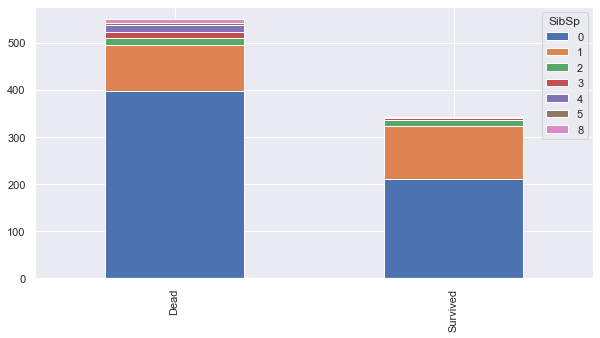

In [26]:
bar_chart("SibSp")

It looks like people with more than one sibling or spouse on the Titanic, were more likely to survive than those that were travelling without.

Parch         0     1     2    3    4    5    6
Dead      445.0  53.0  40.0  2.0  4.0  4.0  1.0
Survived  233.0  65.0  40.0  3.0  NaN  1.0  NaN


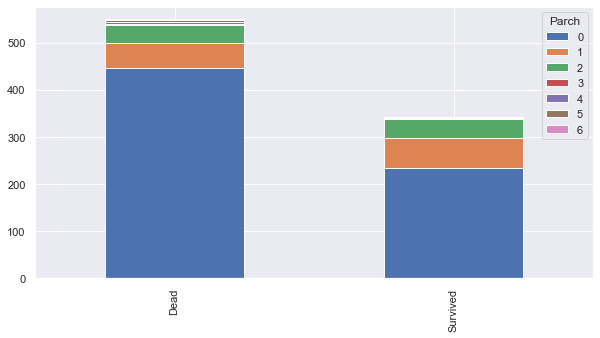

In [27]:
bar_chart("Parch")

Similar distribution to the previous SibSp chart. 

From the previous two graphs passengers with one or more Parch and or SibSp on board had higher chances to survive. If we combine this fact with the colinearity between Parch and SibSp it would be wise to combine them into a single feature called Family Size.

# 2. Feature Engineering
Feature engineering is the process of using domain knowledge to create features (vectors) that make machine learning work. Many algorithms in machine learning require a numerical representation of objects.

For this step we will combine both the train and the test set into a callable object, so that we can conduct all the feature engineering in a single step.

In [28]:
train_test_data = [train, test]

# 2.1. Title
The name of each passenger comes with a Title. This carries information that can be useful to our model.

Lets create a a new feature called "Title", where we will extract the passengers Title from their name feaature using Regex (Regular Expressions)

Relevant Regex videos:

- https://www.youtube.com/watch?v=sa-TUpSx1JA&t=261s

- https://www.youtube.com/watch?v=K8L6KVGG-7o

In [29]:
for data in train_test_data:
    data["Title"] = data["Name"].str.extract(pat = '([A-Za-z]+)\.', expand = False)
    
    #alternative
    #data["Title"] = data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [30]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Lady          1
Countess      1
Ms            1
Sir           1
Mme           1
Capt          1
Jonkheer      1
Name: Title, dtype: int64

Lets collect these into 5 broad groups "Mr", "Miss", "Miss", "Master" and "Other"

In [31]:
for data in train_test_data:
    data.loc[(data['Title'] != 'Mr') & (data['Title'] != 'Miss') & (data['Title'] != 'Mrs') & (data['Title'] != 'Master'), 'Title'] = 'Other'

In [32]:
train["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

Title     Master  Miss   Mr  Mrs  Other
Dead          17    55  436   26     15
Survived      23   127   81   99     12


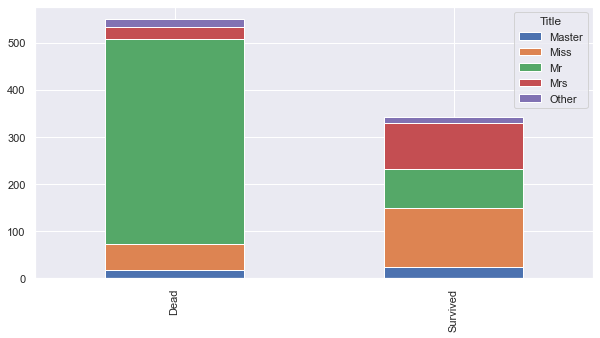

In [33]:
# Lets visualize the survival rate of passengers Titles
bar_chart("Title")

# 2.2. Family Size 

In [34]:
for data in train_test_data:
    data["Family_size"] = data["SibSp"] + data["Parch"]

<AxesSubplot:xlabel='Family_size', ylabel='Count'>

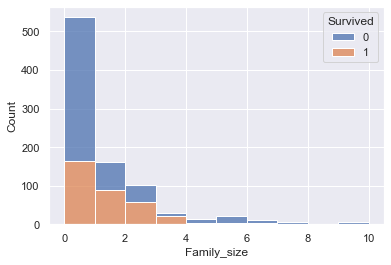

In [35]:
sns.histplot(data = train, x = "Family_size", stat = "count", multiple = "stack", hue = "Survived", bins = 10)

# 2.3. Cabin
The variable cabin has two features that could provide insight into the survival rate of passengers. 

- The first will be the amount of cabins for each passenger. 

- The second will be the location of the cabin according to its letter. 

It could be possibility that passengers of a certain class would be closer together and may have a different amount of cabins which could effect their survival rate.

# 2.3.1. Cabin Multiple

Cabin_multiple      0      1    2    3    4
Dead            481.0   58.0  7.0  3.0  NaN
Survived        206.0  122.0  9.0  3.0  2.0


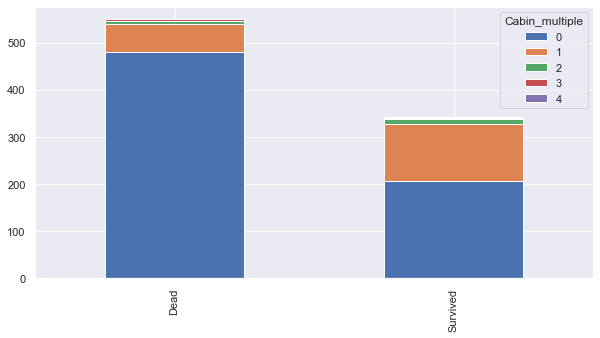

In [36]:
#Lets create a new variable that counts the amount of cabins people had
for data in train_test_data:
    data['Cabin_multiple'] = data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

bar_chart('Cabin_multiple')

It does look like there is a correlation between the amount of cabins each passenger has and their survival rate

<AxesSubplot:title={'center':'Number of cabins per class'}>

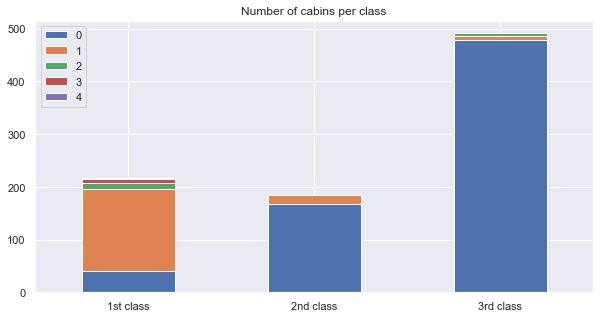

In [37]:
# How are the amount of cabins per passenger distributed across the 3 passenger classes?
Pclass1 = train[train["Pclass"] == 1]["Cabin_multiple"].value_counts()
Pclass2 = train[train["Pclass"] == 2]["Cabin_multiple"].value_counts()
Pclass3 = train[train["Pclass"] == 3]["Cabin_multiple"].value_counts()
df_cabin_mul = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df_cabin_mul.index = ["1st class", "2nd class", "3rd class"]
df_cabin_mul.plot(kind = "bar", stacked = True, figsize = (10, 5), rot = 0, title = "Number of cabins per class")

Most passengers in first class had at least one cabin whilst those in the other classes were a majority of Na values.

# 2.3.2. Cabin Letter

Cabin_letter    a     b     c     d     e    f    g      n    t
Dead          8.0  12.0  24.0   8.0   8.0  5.0  2.0  481.0  1.0
Survived      7.0  35.0  35.0  25.0  24.0  8.0  2.0  206.0  NaN


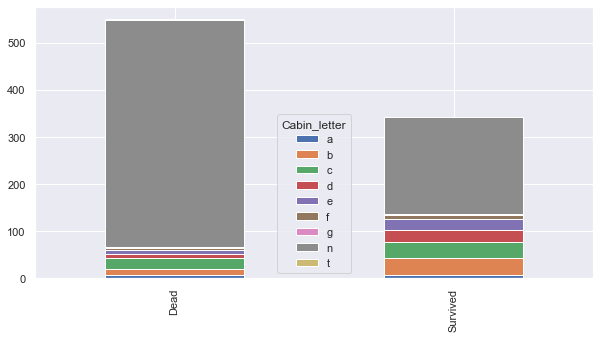

In [38]:
for data in train_test_data:
    data['Cabin_letter'] = data.Cabin.apply(lambda x: str(x)[0].lower())

bar_chart("Cabin_letter")

Missing values denoted as NA can provide useul information when creating models. Perhaps lower class passenger were not assigned cabins.We can investigate this further plotting the cabin letters across the passengers class:

<AxesSubplot:>

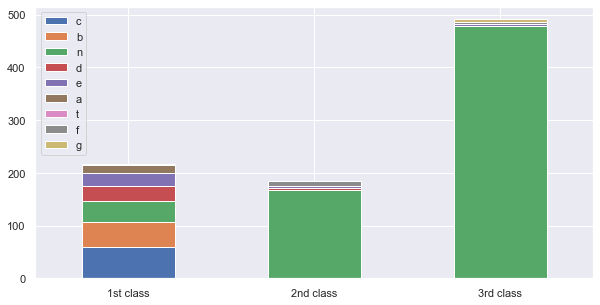

In [39]:
Pclass1 = train[train["Pclass"] == 1]["Cabin_letter"].value_counts()
Pclass2 = train[train["Pclass"] == 2]["Cabin_letter"].value_counts()
Pclass3 = train[train["Pclass"] == 3]["Cabin_letter"].value_counts()
df_cabin_mul = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df_cabin_mul.index = ["1st class", "2nd class", "3rd class"]
df_cabin_mul.plot(kind = "bar", stacked = True, figsize = (10, 5), rot = 0)

# 2.4. Ticket

In [40]:
for data in train_test_data:
    data["Ticket_prefix"] = data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 'n')

for data in train_test_data:
    data["Ticket_letter"] = data["Ticket_prefix"].apply(lambda x: x[0])

In [41]:
train['Ticket_letter'].value_counts()

n    665
p     65
s     65
c     47
a     29
w     13
f      7
Name: Ticket_letter, dtype: int64

Ticket_letter   a   c  f    n   p   s   w
Dead           27  31  3  410  23  44  11
Survived        2  16  4  255  42  21   2


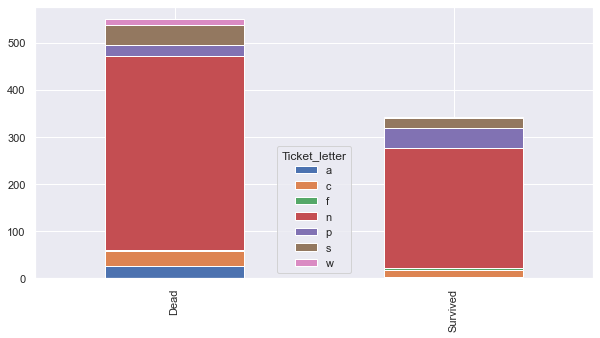

In [42]:
bar_chart('Ticket_letter')

# 3.Data Cleaning

# 3.1. Age
Age has some missing values. Lets fill these missing values with the median age of peoples "Title". This will give a more accurate median value than using the median of the whole dataset.

In [43]:
for data in train_test_data:
    data["Age"].fillna(data.groupby("Title")["Age"].transform("median"), inplace = True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

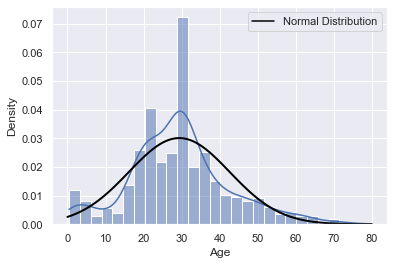

In [44]:
mu, std = norm.fit(train["Age"])
x = np.linspace(0, 80, 100)
p = norm.pdf(x, mu, std)
data_norm = pd.DataFrame(p, index = x, columns = ['Normal Distribution'])

fig, ax = plt.subplots()
sns.histplot(data = train["Age"], stat = 'density', kde = True, ax = ax)
sns.lineplot(data = data_norm, palette=['black'], linewidth = 2, ax=ax)

In [45]:
print("Skewness: %f" % train['Age'].skew())
print("Kurtosis: %f" % train['Age'].kurt())

Skewness: 0.436560
Kurtosis: 0.779375


Note on statistical information

- Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Acceptable values for skewness are between -0.5 and 0.5

- Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values. Acceptable values for Kurotosis are between -2 and 2.

# 3.2. Fare
Lets fill in any missing fair values with the median  of each class.

In [46]:
for data in train_test_data:
    data["Fare"].fillna(data.groupby("Pclass")["Fare"].transform("median"), inplace = True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

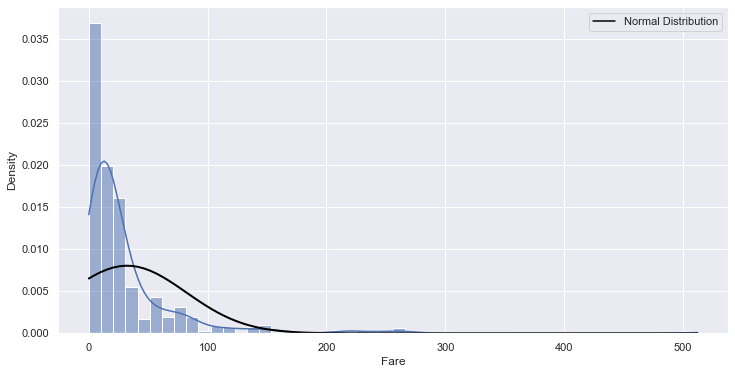

In [47]:
mu, std = norm.fit(train["Fare"])
x = np.linspace(train["Fare"].min(), train["Fare"].max(), 100)
p = norm.pdf(x, mu, std)
data_norm = pd.DataFrame(p, index = x, columns = ['Normal Distribution'])


fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(data = train["Fare"], bins =50, stat = 'density', kde = True, ax = ax)
sns.lineplot(data = data_norm, palette=['black'], linewidth = 2, ax=ax)

In [48]:
print("Skewness: %f" % train['Fare'].skew())
print("Kurtosis: %f" % train['Fare'].kurt())

Skewness: 4.787317
Kurtosis: 33.398141


This exceeds the acceptable limits for skewness and kurtosis. Lets normalise our data as follows.

In [49]:
for data in train_test_data:
    data['norm_fare'] = np.log(data.Fare+1)

<AxesSubplot:xlabel='norm_fare', ylabel='Density'>

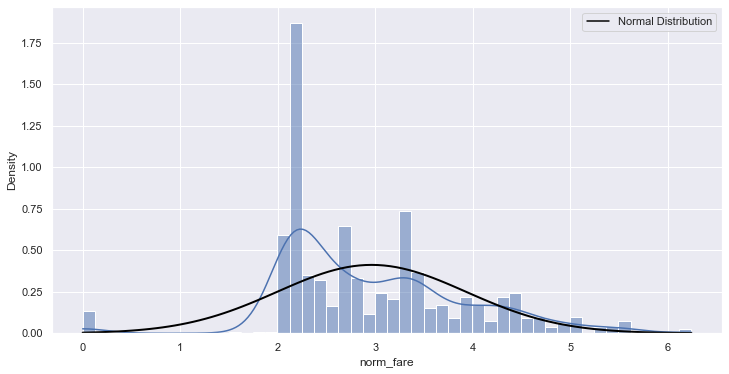

In [50]:
mu, std = norm.fit(train["norm_fare"])
x = np.linspace(train["norm_fare"].min(), train["norm_fare"].max(), 100)
p = norm.pdf(x, mu, std)
data_norm = pd.DataFrame(p, index = x, columns = ['Normal Distribution'])

fig, ax = plt.subplots(figsize = (12, 6))
sns.histplot(data = train["norm_fare"], bins =50, stat = 'density', kde = True, ax = ax)
sns.lineplot(data = data_norm, palette=['black'], linewidth = 2, ax=ax)

In [51]:
print("Skewness: %f" % train['norm_fare'].skew())
print("Kurtosis: %f" % train['norm_fare'].kurt())

Skewness: 0.394928
Kurtosis: 0.976142


# 3.3. Embarked 
We saw earlier under section 1.2.2. most passengers embarked at Southampton (S). Lets fill in the missing values with the most common port passengers embarked on.

In [52]:
for data in train_test_data:
    data["Embarked"].fillna(data['Embarked'].mode()[0], inplace = True)

In [53]:
test.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

# 3.4. Final preparation steps

In [54]:
#Lets remove features we dont want to include in our model
testID = test.PassengerId
for data in train_test_data:
    data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Fare', "Ticket_prefix"], axis = 1, inplace = True)

In [55]:
train_X = train.drop('Survived', axis = 1, inplace = False)
train_Y = train['Survived']
test_X = test.copy()

print('train_X shape = ' + str(train_X.shape))
print('test_X shape = ' + str(test_X.shape))

train_X shape = (891, 10)
test_X shape = (418, 10)


In [56]:
#Scale the Age and Norm_fare columns
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

train_X[['Age','norm_fare']]= scale.fit_transform(train_X[['Age','norm_fare']])
test_X[['Age','norm_fare']]= scale.fit_transform(test_X[['Age','norm_fare']])

# 3.5. Encoding

In [57]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

OHE = OneHotEncoder(handle_unknown='ignore', sparse = True)
OE = OrdinalEncoder(categories = [[1, 2, 3]])
column_trans = make_column_transformer((OHE, ['Sex', 'Embarked', 'Title', 'Cabin_letter', 'Ticket_letter']), (OE, ['Pclass']), remainder = 'passthrough')

column_trans.fit(train_X)
train_X = column_trans.transform(train_X)
test_X = column_trans.transform(test_X)

In [58]:
print('train_X shape = ' + str(train_X.shape))
print('train_Y shape = ' + str(train_Y.shape))
print('test_X shape = ' + str(test_X.shape))

train_X shape = (891, 31)
train_Y shape = (891,)
test_X shape = (418, 31)


# 4. Modelling

# 4.1. Base Models

In [59]:
#Lets import the relevant modules and classes we will use to create modles

from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
#from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

k_fold = KFold(n_splits = 5, shuffle = True, random_state = 1)

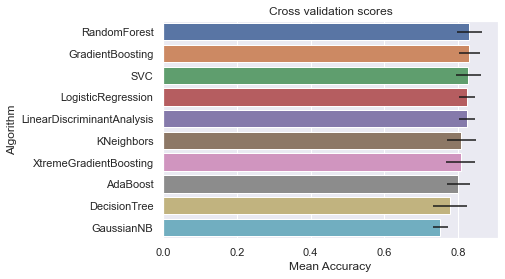

In [60]:
#Base models

gnb = GaussianNB()
lr = LogisticRegression(max_iter = 2000, random_state = 1)
svc = SVC(probability = True, random_state = 1)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ada = AdaBoostClassifier(random_state = 1)
gbc = GradientBoostingClassifier(random_state = 1)
lda = LinearDiscriminantAnalysis()
xgb = XGBClassifier(random_state =1)

classifiers = [gnb, lr, svc, knn, dt, rf, ada, gbc, lda, xgb] #xgb
cv_scores = []
cv_means = []
cv_std = []

for classifier in classifiers :
    score = cross_val_score(classifier, X = train_X, y = train_Y, scoring = "accuracy", cv = k_fold, n_jobs=4)
    cv_scores.append(score)
    cv_means.append(score.mean())
    cv_std.append(score.std())
    
cv_results = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["GaussianNB","LogisticRegression","SVC",
"KNeighbors","DecisionTree","RandomForest","AdaBoost","GradientBoosting","LinearDiscriminantAnalysis", "XtremeGradientBoosting"]}) # "ExtremeGradientBoosting",

cv_results.sort_values("CrossValMeans", ascending = False, inplace = True)

g = sns.barplot(x = cv_results["CrossValMeans"], y = cv_results["Algorithm"],orient = "h",**{'xerr':cv_results["CrossValerrors"]})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [61]:
cv_results

,CrossValMeans,CrossValerrors,Algorithm
5,0.830582,0.034357,RandomForest
7,0.830569,0.028428,GradientBoosting
2,0.828316,0.034178,SVC
1,0.824951,0.021966,LogisticRegression
8,0.823809,0.022224,LinearDiscriminantAnalysis
3,0.809240,0.039355,KNeighbors
9,0.807018,0.038640,XtremeGradientBoosting
6,0.800270,0.031550,AdaBoost
4,0.777842,0.046016,DecisionTree
0,0.751993,0.021055,GaussianNB


# 4.2. Fine Tuning Models

In [62]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

In [63]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [64]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 6)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# 4.2.1. Random Forest Optimisation

In [65]:
# Because of the large feature space, used randomized search to narrow down the paramters for the model. 
# Then take the best model and do a more granular search with gridsearch

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [50, 100,200, 500, 750, 1000, 1250], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10, 15],
                                  'min_samples_split': [2,5,10, 15]}
                                  
rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 250, cv = k_fold, verbose = True, n_jobs = 4)
best_rf_rnd = rf_rnd.fit(train_X,train_Y)
clf_performance(best_rf_rnd,'Random Forest')

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 1250 out of 1250 | elapsed:  3.3min finished


Random Forest
Best Score: 0.8372920720607621
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [66]:
# Gridsearch of parameters around 
"""Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 
'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}"""

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [150,200,300],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True, False],
                                  'max_depth': [8, 10, 12],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [1,2],
                                  'min_samples_split': [8,10, 12]}
                                  
rf_gs = GridSearchCV(rf, param_grid = param_grid, cv = k_fold, verbose = True, n_jobs = 4)
rf_gs.fit(train_X,train_Y)
rf_best = rf_gs.best_estimator_

clf_performance(rf_gs,'Random Forest')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   26.0s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 2476 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 3240 out of 3240 | elapsed:  3.7min finished


Random Forest
Best Score: 0.8406754127173436
Best Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 300}


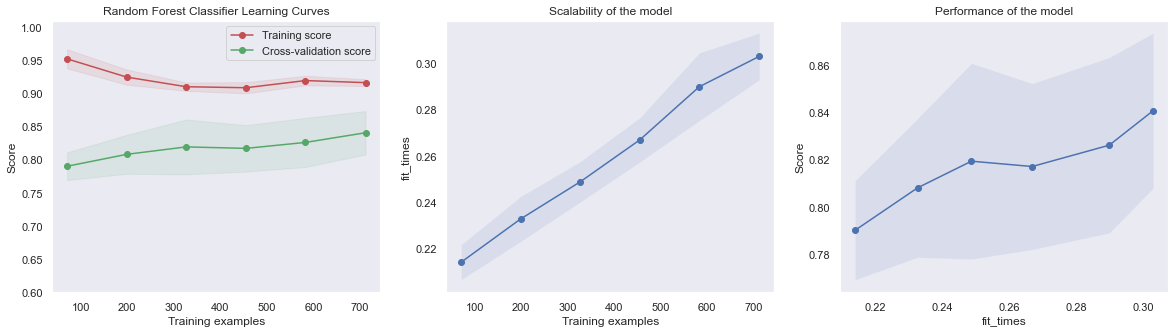

In [67]:
f = plot_learning_curve(rf_best, "Random Forest Classifier Learning Curves", train_X, train_Y, ylim=(0.6, 1.01),
                    cv=k_fold, n_jobs=4)

# 4.2.2. Gradient Boosting Optimisation

In [68]:
#Because the feature space is also verey big lets conduct a randomized search first 
gbc = GradientBoostingClassifier(random_state = 1)

param_grid = {'loss' : ["deviance", "exponential"],
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'n_estimators' : [10, 20, 50, 100, 200, 500, 1000],
              'learning_rate': [0.003, 0.01, 0.03, 0.1, 0.3, 1],
              'max_depth': [1,2, 3, 4, 5, 8, 10, 15],
              'min_samples_split' : [1,2,3,5,10],
              'min_samples_leaf': [1, 2,4,8,20, 50, 100, 200],
              'max_features': [0.3, 0.1], 
              'n_iter_no_change': [5],
              'validation_fraction': [0.05]
            }

gbc_rnd = RandomizedSearchCV(gbc, param_distributions = param_grid, n_iter = 1000, cv = k_fold, verbose = True, n_jobs = 4)
best_gbc_rnd = gbc_rnd.fit(train_X,train_Y)
clf_performance(best_gbc_rnd,'Gradient Boosting')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 104 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 695 tasks      | elapsed:   18.2s
[Parallel(n_jobs=4)]: Done 1552 tasks      | elapsed:   44.5s
[Parallel(n_jobs=4)]: Done 3527 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 4946 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 5000 out of 5000 | elapsed:  2.3min finished


Gradient Boosting
Best Score: 0.8417864540832338
Best Parameters: {'validation_fraction': 0.05, 'n_iter_no_change': 5, 'n_estimators': 1000, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 0.3, 'max_depth': 8, 'loss': 'deviance', 'learning_rate': 0.01, 'criterion': 'mae'}


In [69]:
gbc = GradientBoostingClassifier(random_state = 1)
gbc_param =  {'loss' : ["deviance"],
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'n_estimators' : [45, 50, 55],
              'learning_rate': [0.1, 0.2],
              'max_depth': [4,5, 6],
              'min_samples_split' : [2,3,4],
              'min_samples_leaf': [1, 2, 3],
              'max_features': [0.2, 0.1], 
              'n_iter_no_change': [5],
              'validation_fraction': [0.05]
            }

gbc_gs = GridSearchCV(gbc, param_grid = gbc_param, cv = k_fold, verbose = True, n_jobs = 4)
gbc_gs.fit(train_X, train_Y)
gbc_best = gbc_gs.best_estimator_

# Best score
clf_performance(gbc_gs, "GradientBoostingClassifier")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1400 tasks      | elapsed:   10.4s
[Parallel(n_jobs=4)]: Done 3372 tasks      | elapsed:   29.0s
[Parallel(n_jobs=4)]: Done 3736 tasks      | elapsed:   42.4s
[Parallel(n_jobs=4)]: Done 4292 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 4853 out of 4860 | elapsed:  1.2min remaining:    0.0s


GradientBoostingClassifier
Best Score: 0.8440210909547423
Best Parameters: {'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 6, 'max_features': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 45, 'n_iter_no_change': 5, 'validation_fraction': 0.05}


[Parallel(n_jobs=4)]: Done 4860 out of 4860 | elapsed:  1.2min finished


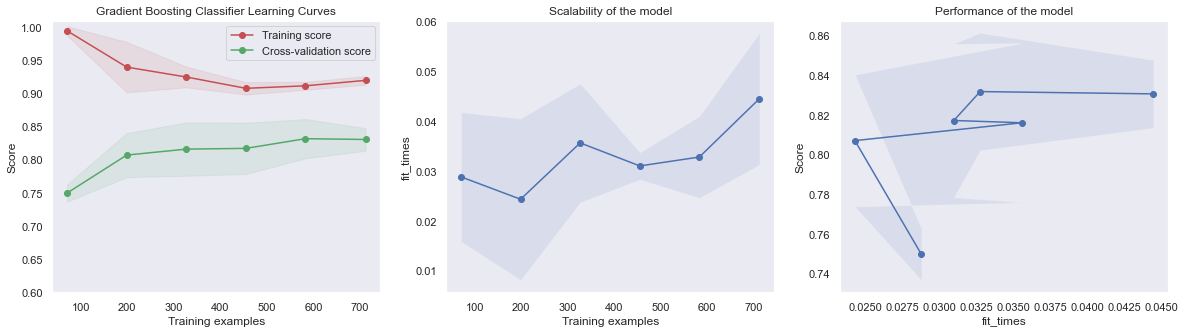

In [70]:
g = plot_learning_curve(gbc_best, "Gradient Boosting Classifier Learning Curves", train_X, train_Y, ylim=(0.6, 1.01),
                    cv=k_fold, n_jobs=4)

# 4.2.3. Support Vector Classifier Opmitisation

In [71]:
### SVC classifier
svc = SVC(random_state = 1, probability=True)
svc_param = {'kernel': ['rbf'], 
                  'gamma': [ 0.008, 0.009, 0.01, 0.0125, 0.015],
                  'C': [1, 3, 4, 5, 6, 7, 10, 25, 50]}

svc_gs = GridSearchCV(svc, param_grid = svc_param, cv = k_fold, verbose = True, n_jobs = 4)
svc_gs.fit(train_X, train_Y)
svc_best = svc_gs.best_estimator_

# Best score
clf_performance(svc_gs, "Support Vector Classifier")

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.3s


Support Vector Classifier
Best Score: 0.831680371602536
Best Parameters: {'C': 6, 'gamma': 0.015, 'kernel': 'rbf'}


[Parallel(n_jobs=4)]: Done 218 out of 225 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 225 out of 225 | elapsed:    4.0s finished


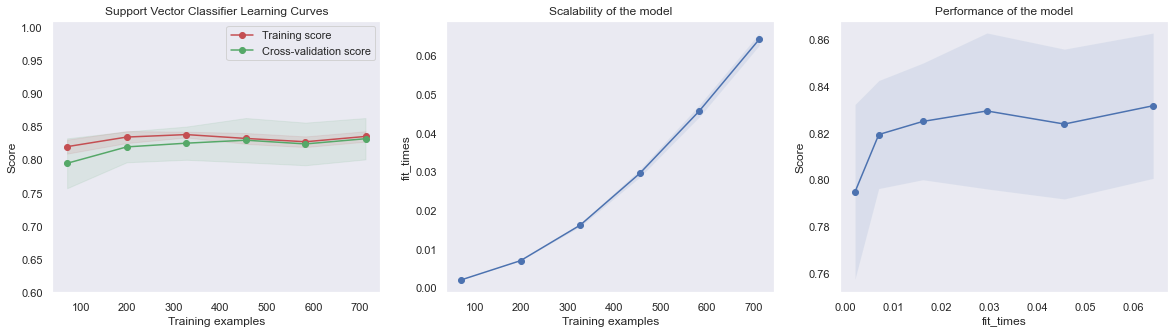

In [72]:
h = plot_learning_curve(svc_best, "Support Vector Classifier Learning Curves", train_X, train_Y, ylim=(0.6, 1.01),
                    cv=k_fold, n_jobs=4)

# 4.2.4. Extreme Gradient Boosting

In [73]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,0.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = k_fold, verbose = True, n_jobs = 4)
best_xgb_rnd = xgb_rnd.fit(train_X,train_Y)
clf_performance(best_xgb_rnd,'Xtreme Gradient Boosting')


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 112 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 372 tasks      | elapsed:   26.9s
[Parallel(n_jobs=4)]: Done 932 tasks      | elapsed:   53.4s
[Parallel(n_jobs=4)]: Done 1808 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 2814 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 4128 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done 5000 out of 5000 | elapsed:  4.8min finished
C:\Users\luisg\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:51:26] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xtreme Gradient Boosting
Best Score: 0.840656581507752
Best Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 25, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.7}


In [74]:
xgb = XGBClassifier(random_state = 1)

xgb_param = {
    'n_estimators': [15, 20, 25],
    'colsample_bytree': [0.75, 0.8, 0.85],
    'max_depth': [22,25, 30, 40],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [1.25, 1.5, 1.75],
    'subsample': [0.7],
    'learning_rate':[0.1],
    'gamma':[0.01],
    'min_child_weight':[0.003,0.01,0.03],
    'sampling_method': ['uniform']
}

xgb_gs = GridSearchCV(xgb, param_grid = xgb_param, cv = k_fold, verbose = True, n_jobs = 4)
xgb_gs.fit(train_X, train_Y)
xgb_best = xgb_gs.best_estimator_

# Best score
clf_performance(xgb_gs, "Extreme GradientBoostingClassifier")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 1728 tasks      | elapsed:   30.1s
[Parallel(n_jobs=4)]: Done 3128 tasks      | elapsed:   54.5s


[12:52:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme GradientBoostingClassifier
Best Score: 0.8417801770133702
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 22, 'min_child_weight': 0.003, 'n_estimators': 20, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'sampling_method': 'uniform', 'subsample': 0.7}


[Parallel(n_jobs=4)]: Done 4860 out of 4860 | elapsed:  1.4min finished


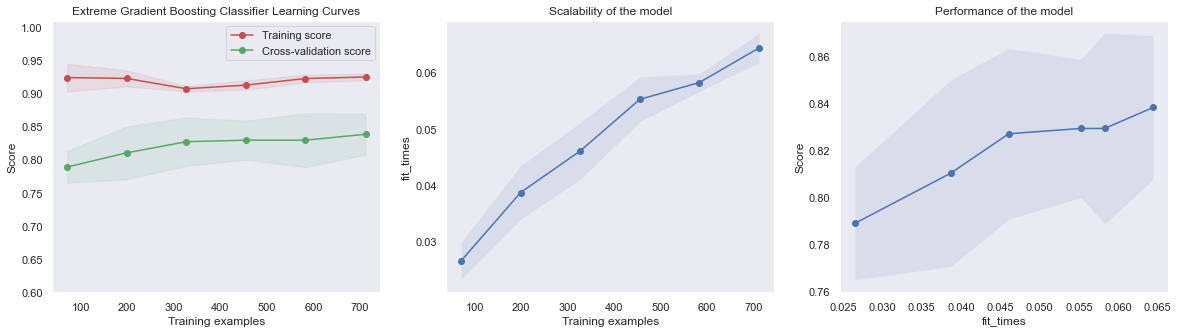

In [75]:
i = plot_learning_curve(xgb_best, "Extreme Gradient Boosting Classifier Learning Curves", train_X, train_Y, ylim=(0.6, 1.01),
                    cv=k_fold, n_jobs=4)

# 4.3.Model Ensamble
Lets create a meta model using the 4 previously trained models.

In [76]:
models = {"rf": rf_best, "gbc":gbc_best, "svc": svc_best, "xgb": xgb_best}
predictions = {}
for model in models:
    prediction = models[model].predict(test_X).astype(int)
    predictions[model] = prediction

In [77]:
#Saving results
submissions = {}
for prediction in predictions:
    submission = pd.DataFrame({
        'PassengerId': testID, 
        'Survived' : predictions[prediction]})
    submission.to_csv(('Submissions/Submission_'+str(prediction)+'.csv'), index = False)
    submissions[prediction] = submission

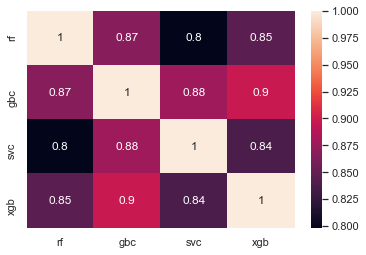

In [78]:
#Lets compare the results across our models
ensemble_results = pd.DataFrame.from_dict(predictions)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [79]:
rf_params = {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 300}
gbc_params = {'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 6, 'max_features': 0.2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 45, 'n_iter_no_change': 5, 'validation_fraction': 0.05}
svc_params = {'C': 6, 'gamma': 0.015, 'kernel': 'rbf'}
xgb_params = {'colsample_bytree': 0.85, 'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 22, 'min_child_weight': 0.003, 'n_estimators': 20, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'sampling_method': 'uniform', 'subsample': 0.7}
# info on ** visit
# https://www.geeksforgeeks.org/packing-and-unpacking-arguments-in-python/

rf_ens = RandomForestClassifier(**rf_params, random_state = 1)
gbc_ens = GradientBoostingClassifier(**gbc_params, random_state = 1)
svc_ens = SVC(**svc_params, random_state = 1, probability=True)
xgb_ens = XGBClassifier(**xgb_params, random_state = 1)

- To get the parameters to feed into our meta-model lets define a function to calculate the out of fold predictions for our base models.
- This will serve as the "meta" features we will train our second order model on.
- The function aslo needs to return the out of fold predictions for the test set.
- These will be the parameters our meta model will use to make predictions.

In [80]:
ntrain = train_X.shape[0]
ntest = test_X.shape[0]
NFOLDS = 5
kf = KFold(n_splits= NFOLDS, shuffle=False)

def get_oof(clf, train_X, train_Y, test_X):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(train_X)):
        x_tr = train_X[train_index]
        y_tr = train_Y[train_index]
        x_te = train_X[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(test_X)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [81]:
rf_oof_train, rf_oof_test = get_oof(rf_ens,train_X, train_Y, test_X) # Random Forest
gbc_oof_train, gbc_oof_test = get_oof(gbc_ens,train_X, train_Y, test_X) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc_ens,train_X, train_Y, test_X) # Support Vector Classifier
xgb_oof_train, xgb_oof_test = get_oof(xgb_ens,train_X, train_Y, test_X) # Support Vector Classifier

[12:52:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\luisg\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [82]:
x_train = np.concatenate(( rf_oof_train, gbc_oof_train, svc_oof_train, xgb_oof_train), axis=1)
x_test = np.concatenate(( rf_oof_test, gbc_oof_test, svc_oof_test, xgb_oof_test), axis=1)

In [83]:
#Lets tune our meta model parameters with gridsearch first
metamodel = XGBClassifier(random_state = 2)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,0.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

metamodel = RandomizedSearchCV(metamodel, param_distributions = param_grid, n_iter = 1500, cv = k_fold, verbose = True, n_jobs = 4)
best_metamodel_rnd = metamodel.fit(x_train,train_Y)
clf_performance(best_metamodel_rnd,'MetaModel Xtreme Gradient Boosting')

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 784 tasks      | elapsed:   19.8s
[Parallel(n_jobs=4)]: Done 1728 tasks      | elapsed:   47.9s
[Parallel(n_jobs=4)]: Done 3240 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 5632 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 7500 out of 7500 | elapsed:  3.3min finished


[12:56:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MetaModel Xtreme Gradient Boosting
Best Score: 0.8417864540832338
Best Parameters: {'subsample': 0.8, 'sampling_method': 'uniform', 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 0.1, 'max_depth': 25, 'learning_rate': 0.5, 'gamma': 0, 'colsample_bytree': 0.8}


In [88]:
metamodel_gs = XGBClassifier(random_state = 2)

xgb_param = {
    'n_estimators': [350 , 500, 700],
    'colsample_bytree': [0.8],
    'max_depth': [25, 30],
    'reg_alpha': [0.25, 0.5, 0.75],
    'reg_lambda': [2, 2.5],
    'subsample': [0.7, 0.8, 0.9],
    'learning_rate':[0.5],
    'gamma':[0.01],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

metamodel_gs = GridSearchCV(metamodel_gs, param_grid = xgb_param, cv = k_fold, verbose = True, n_jobs = 4)
metamodel_gs.fit(x_train, train_Y)
metamodel_best = metamodel_gs.best_estimator_

# Best score
clf_performance(metamodel_gs, "Metamodel Extreme Gradient Boosting Classifier")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   32.3s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   42.9s finished


[13:01:13] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Metamodel Extreme Gradient Boosting Classifier
Best Score: 0.8406628585776159
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.01, 'learning_rate': 0.5, 'max_depth': 25, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 0.25, 'reg_lambda': 2, 'sampling_method': 'uniform', 'subsample': 0.8}


In [89]:
metamodel_best.fit(x_train, train_Y)

predictions = metamodel_best.predict(x_test)

[13:01:36] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [90]:
#Create submission

# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'PassengerId': testID,
                            'Survived': predictions })

StackingSubmission.to_csv('Submissions/StackingSubmission.csv', index=False)